<a href="https://colab.research.google.com/github/ernesto-sadeghi/ai/blob/main/implementing_my_first_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('/content/housePrice.csv')

In [4]:
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [5]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1fqvtSQ0osxibeMhT8bHnMCyUe8sUKbCkWYVMPY-l0WE/edit#gid=0


In [6]:
data.info()
print("\n")
print("\n")
print("\n")
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB








,count,mean,std,min,25%,50%,75%,max
Room,3479.0,2.079908e+00,7.582753e-01,0.0,2.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
Price,3479.0,5.359023e+09,8.099935e+09,3600000.0,1.418250e+09,2.900000e+09,6.000000e+09,9.240000e+10
Price(USD),3479.0,1.786341e+05,2.699978e+05,120.0,4.727500e+04,9.666667e+04,2.000000e+05,3.080000e+06


In [7]:
data.describe(include='object').T

,count,unique,top,freq
Area,3479,243,75,111
Address,3456,192,Punak,161


In [8]:
data.shape
# data.shape[0]

(3479, 8)

#Preproccesing

In [9]:
data.isnull().sum()

,0
Area,0
Room,0
Parking,0
Warehouse,0
Elevator,0
Address,23
Price,0
Price(USD),0


In [10]:
data.dropna(inplace=True)
data.isnull().sum() / data.shape[0] *100

,0
Area,0.0
Room,0.0
Parking,0.0
Warehouse,0.0
Elevator,0.0
Address,0.0
Price,0.0
Price(USD),0.0


In [11]:
data.duplicated().sum()

np.int64(208)

In [12]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [13]:
data['Area']=data['Area'].str.replace(" ",'')
data['Area']=data['Area'].str.replace(",",'')

In [14]:
data['Area']=data['Area'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3248 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3248 non-null   int64  
 1   Room        3248 non-null   int64  
 2   Parking     3248 non-null   bool   
 3   Warehouse   3248 non-null   bool   
 4   Elevator    3248 non-null   bool   
 5   Address     3248 non-null   object 
 6   Price       3248 non-null   float64
 7   Price(USD)  3248 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 161.8+ KB


In [15]:
data['Address'].nunique()

192

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Address']=le.fit_transform(data["Address"])
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,156,1.850000e+09,61666.67
1,60,1,True,True,True,156,1.850000e+09,61666.67
2,79,2,True,True,True,117,5.500000e+08,18333.33
3,95,2,True,True,True,152,9.025000e+08,30083.33
4,123,2,True,True,True,150,7.000000e+09,233333.33


In [17]:
for col in ['Parking','Warehouse','Elevator'] :
    data[col] = data[col].astype(int)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156,1.850000e+09,61666.67
1,60,1,1,1,1,156,1.850000e+09,61666.67
2,79,2,1,1,1,117,5.500000e+08,18333.33
3,95,2,1,1,1,152,9.025000e+08,30083.33
4,123,2,1,1,1,150,7.000000e+09,233333.33


In [18]:
numerical_cols = data.select_dtypes(include=['int64','float64']).columns
q1= data[numerical_cols].quantile(0.25)
q3= data[numerical_cols].quantile(0.75)
iqr =q3-q1
data= data[~((data[numerical_cols] < (q1-1.5*iqr)) | (data[numerical_cols] > (q3+1.5*iqr))).any(axis=1)]

Text(0.5, 1.0, 'Area')

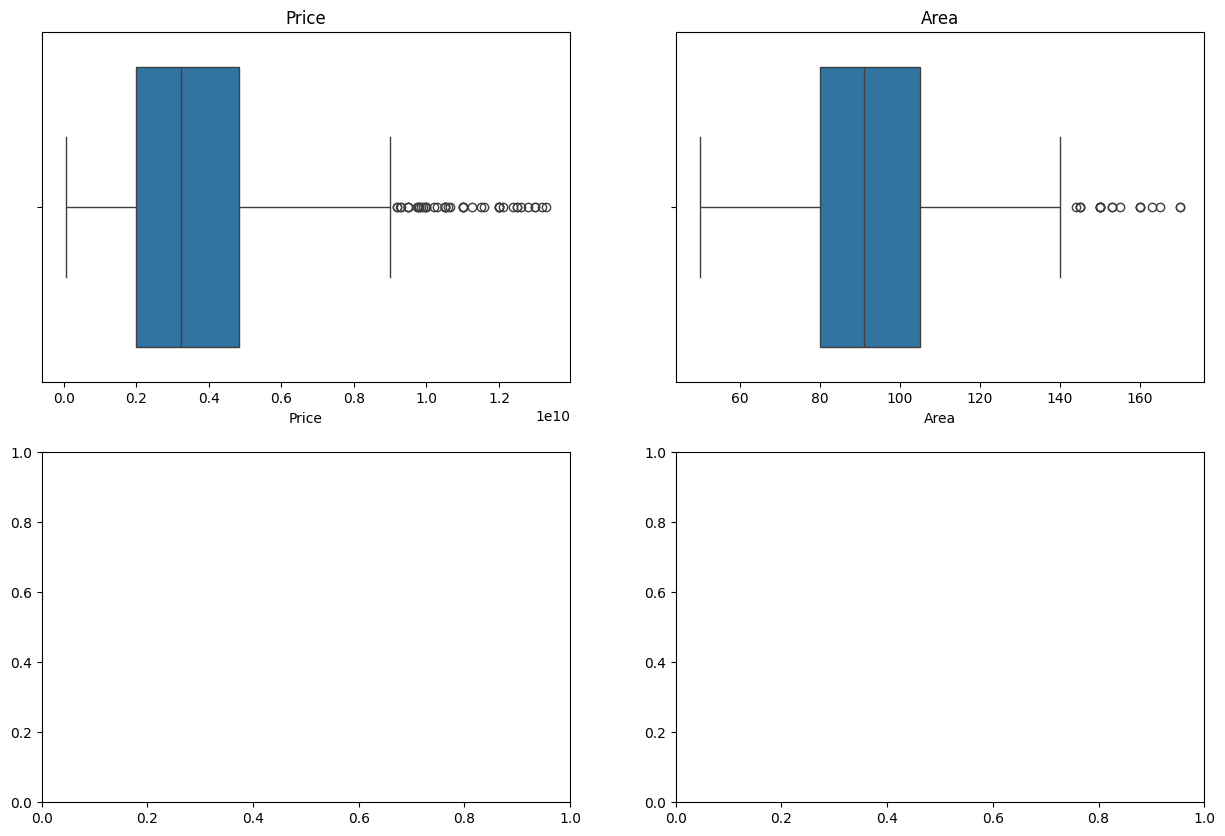

In [ ]:
fig , axes = plt.subplots(2,2,figsize=(15,10))
sns.boxplot(x='Price',data=data,ax=axes[0,0])
axes[0,0].set_title('Price')

sns.boxplot(x='Area',data=data,ax=axes[0,1])
axes[0,1].set_title('Area')

In [20]:
# z_score = np.abs((data[numerical_cols] - data[numerical_cols].mean()) / data[numerical_cols].std())
z_score = (data[numerical_cols] - data[numerical_cols].mean()) / data[numerical_cols].std()

In [23]:
from sklearn.model_selection import train_test_split
X=data.drop(['Price(USD)','Price'],axis=1)
y= data['Price(USD)']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scalar = StandardScaler()
X_train['Area'] =scalar.fit_transform(X_train[['Area']])

In [28]:
scalar.transform(X_test[['Area']])

array([[-1.15262075],
       [ 0.77750004],
       [-0.49086505],
       [-0.93203551],
       [-1.42835229],
       [ 0.61206112],
       [-1.75923014],
       [-1.20776706],
       [-0.43571874],
       [-1.04232813],
       [ 0.5017685 ],
       [-0.76659659],
       [ 0.66720743],
       [-0.49086505],
       [ 3.25908391],
       [ 0.77750004],
       [ 2.26645036],
       [-0.87688921],
       [-1.4834986 ],
       [-1.04232813],
       [ 0.61206112],
       [-0.65630397],
       [ 0.06059803],
       [-1.04232813],
       [-1.15262075],
       [ 0.88779266],
       [-0.76659659],
       [-1.26291336],
       [-0.21513351],
       [-0.43571874],
       [ 0.44662219],
       [-0.04969458],
       [ 0.33632958],
       [-0.04969458],
       [-0.76659659],
       [ 0.44662219],
       [-1.86952275],
       [-0.54601136],
       [-1.59379121],
       [ 0.33632958],
       [ 1.21867051],
       [ 0.33632958],
       [-0.21513351],
       [ 0.33632958],
       [-0.49086505],
       [ 0

In [29]:
from sklearn .linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

In [33]:
print("="*100)
print("train score :")
print("r2 score :",r2_score(y_train,y_train_predict))
print("MSE score :",mean_squared_error(y_train,y_train_predict))

print("="*100)
print("test score :")
print("r2 score :",r2_score(y_test,y_test_predict))
print("MSE score :",mean_squared_error(y_test,y_test_predict))

train score :
r2 score : 0.2882710333215648
MSE score : 4843898792.036049
test score :
r2 score : -2551.670157838225
MSE score : 15888688292497.357


In [34]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,y_train)

SVR()

In [35]:
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

In [36]:
print("="*100)
print("train score :")
print("r2 score :",r2_score(y_train,y_train_predict))
print("MSE score :",mean_squared_error(y_train,y_train_predict))

print("="*100)
print("test score :")
print("r2 score :",r2_score(y_test,y_test_predict))
print("MSE score :",mean_squared_error(y_test,y_test_predict))

train score :
r2 score : -0.03593505960547372
MSE score : 7050386901.166975
test score :
r2 score : -0.008584940773793903
MSE score : 6277776112.693253
